In [2]:
import keras
# Cargue el conjunto de datos Fashion MNIST
fmnist = keras.datasets.fashion_mnist
# Cargue la división de entrenamiento y prueba del conjunto de datos Fashion MNIST
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


LABEL: 0

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42 

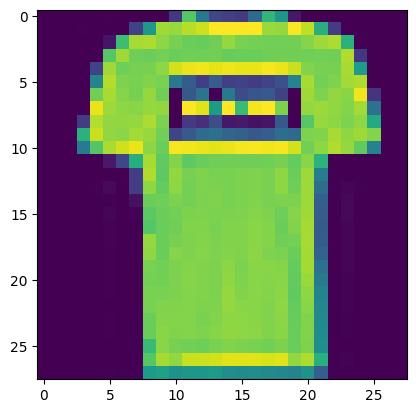

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Puedes poner aquí entre 0 y 59999
index = 1
# Imprime la etiqueta y la imagen
np.set_printoptions(linewidth=320)
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')
# Visualiza la imagen
plt.imshow(training_images[index])

In [4]:
# Normalizar los valores de pixeles del tren y probar las imágenes
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [5]:
# Construir el modelo de clasificación
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Entrenar el modelo
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7751 - loss: 0.6501
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8609 - loss: 0.3854
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8741 - loss: 0.3468
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8842 - loss: 0.3180
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8927 - loss: 0.2880
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8967 - loss: 0.2833
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9009 - loss: 0.2660
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9061 - loss: 0.2540
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9077 - loss: 0.2470
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9113 - loss: 0.2394


<Axes: >

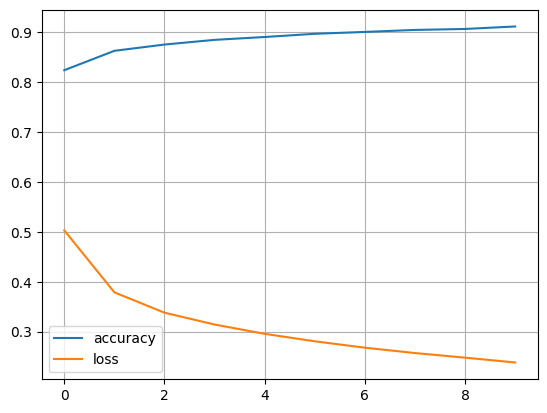

In [8]:
# Graficar el historial de entrenamiento
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

In [9]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print(f'LOSS en entrenamiento: {loss}')
print(f'ACCURACY en entrenamiento: {accuracy}')

# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'LOSS en prueba: {loss}')
print(f'ACCURACY en prueba: {accuracy}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9132 - loss: 0.2336
LOSS en entrenamiento: 0.23497620224952698
ACCURACY en entrenamiento: 0.9133166670799255
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8785 - loss: 0.3503
LOSS en prueba: 0.34616944193840027
ACCURACY en prueba: 0.8806999921798706


In [10]:
# Predict
index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Clasification:\n {classification.reshape(-1,1)}')

Label: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Clasification:
 [[1.2361077e-05]
 [4.2777906e-11]
 [9.9981374e-01]
 [1.5781125e-10]
 [5.1536870e-05]
 [7.8956420e-16]
 [1.2243714e-04]
 [7.9180954e-13]
 [8.2042773e-10]
 [4.4493693e-11]]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step


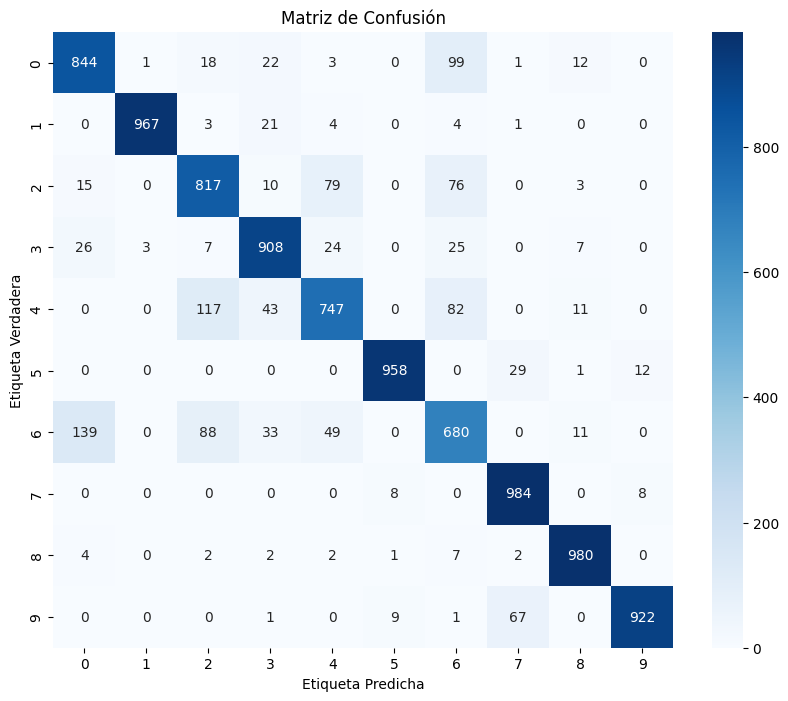

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtener las predicciones del modelo en el conjunto de prueba
test_predictions = model.predict(test_images)
predicted_labels = np.argmax(test_predictions, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

In [17]:
# Consulta
num_0 = cm[0,0]
soporte_0 = cm[0,0] + cm[0,1] + cm[0,2] + cm[0,3] + cm[0,4] + cm[0,5] + cm[0,6] + cm[0,7] + cm[0,8] + cm[0,9]
denominador_fila_0 = soporte_0
denominador_columna_0 = cm[0,0] + cm[1,0] + cm[2,0] + cm[3,0] + cm[4,0] + cm[5,0] + cm[6,0] + cm[7,0] + cm[8,0] + cm[9,0]


print(num_0)
print(soporte_0)

1000


In [12]:
from sklearn.metrics import classification_report

# Obtener las predicciones del modelo en el conjunto de prueba
test_predictions = model.predict(test_images)
predicted_labels = np.argmax(test_predictions, axis=1)

# Generar el reporte de clasificación
report = classification_report(test_labels, predicted_labels)

# Imprimir el reporte de clasificación
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       1.00      0.97      0.98      1000
           2       0.78      0.82      0.80      1000
           3       0.87      0.91      0.89      1000
           4       0.82      0.75      0.78      1000
           5       0.98      0.96      0.97      1000
           6       0.70      0.68      0.69      1000
           7       0.91      0.98      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.98      0.92      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

